## <div style="text-align: center; background-color: #A5D74A;  color: black; padding: 14px; line-height: 0.5;"> <b>EDA on Bigbasket Dataset</b></div>

<img src="big-basket-Banner%20-%20Copy.jpeg" alt="A beautiful sunset" width="600" height="500">

<p style="font-size: 18px;"><b>BigBasket Overview</b></p>
<p>BigBasket is an online grocery store in India that offers a wide range of products including fresh fruits and vegetables, meat and poultry, dairy products, bakery items, and household essentials. The company has its own supply chain network with a large number of warehouses and cold storage facilities across the country. It also has tie-ups with several local farmers and vendors to source fresh produce directly from them.</p>

<p>Customers can place orders on the BigBasket website or mobile app, and choose from a range of payment options including cash on delivery, credit/debit cards, and digital wallets. The company offers various delivery options such as express delivery, same-day delivery, and next-day delivery, depending on the customer's location.</p>

<p>BigBasket also offers various membership plans for customers, including a subscription-based model called BB Star, which provides benefits such as free delivery, early access to sales, and cashback on purchases.</p>

<p>Overall, BigBasket is a popular online grocery store in India known for its wide range of products, reliable delivery, and customer-friendly policies.</p>


<p style="font-size: 18px;"><b>About Dataset</b></p>
<p>E-commerce (electronic commerce) is the activity of electronically buying or selling of products on online services or over the Internet. E-commerce draws on technologies such as mobile commerce, electronic funds transfer, supply chain management, Internet marketing, online transaction processing, electronic data interchange (EDI), inventory management systems, and automated data collection systems. E-commerce is in turn driven by the technological advances of the semiconductor industry, and is the largest sector of the electronics industry.</p>

<p>Bigbasket is the largest online grocery supermarket in India. Was launched somewhere around in 2011 since then they've been expanding their business. Though some new competitors have been able to set their foot in the nation such as Blinkit etc. but BigBasket has still not loose anything - thanks to ever expanding popular base and their shift to online buying.</p>



<a class="anchor" id="toc"></a>
<h1 style = 'text-align: center;font-family : Calibri'> 📙Table of Contents  </h1> 

<div class="list-group" id="list-tab" role="tablist">
   
* [<b>1. 📚Importing Libraries](#1)  
* [<b>2. 📖Reading Datasets from csv files](#2)
* [<b>3. 🗄️Data Preparation</b>](#3)          
* [<b>4. 📊Exploratory Data Analysis</b>](#4)
    - [4.1 🥘High Level Summary of the Dataset](#4.1)
    - [4.2 🍯Analysis of Categorical features: Products, Category, Sub-Category and Product Type](#4.2)
    - [4.3 🛒Analysis of Sale Price](#4.3)
    - [4.4 🛍️Analysis of Rating](#4.4)
    - [4.5 🤑Analysis of Discount](#4.5)
    - [4.6 🏷️Analysis of Bigbasket's Own Brands](#4.6)
* [<b>5. 🛒Thank You🛒</b>](#5)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

import colorama
from colorama import Fore, Back, Style


from wordcloud import WordCloud

#ignoring warnings to keep the output clean
import warnings
warnings.filterwarnings('ignore')

<a id="2"></a>
# <div style="text-align: left; background-color: #A5D74A;  color: black; padding: 14px; line-height: 0.5;"> 📖Reading Datasets from csv files</div>

In [2]:
prod_data = pd.read_csv('BigBasket Products.csv')
colorsy = ['#474a2a', '#5b5f2d', '#647b30', '#8f955d', '#7f9657', '#9ea980', '#8da860', '#bbc48f', '#aac483']

In [3]:
print(Back.GREEN+ Style.BRIGHT+'Bigbasket Data:'+ Style.RESET_ALL)
prod_data.head(5).style.set_properties(**{'background-color': '#bbc48f' ,'border': '1.3px solid black','color':'black','border-color': '#000000'})

Bigbasket Data:


<a id="3"></a>
# <div style="text-align: left; background-color: #A5D74A;  color: black; padding: 14px; line-height: 0.5;"> 🗄️Data Preparation</div>

In [4]:
#Handling Null values
prod_data['product'].fillna('NoProductName',inplace = True)

#Rounding off the numerical features
prod_data['sale_price'] = prod_data['sale_price'].round().astype(int)
prod_data['market_price'] = prod_data['market_price'].round().astype(int)

In [5]:
#Computing discount offered on each product
prod_data['discount_pct']=(prod_data['market_price'] - prod_data['sale_price']) *100/ prod_data['market_price']
prod_data= prod_data.round({"discount_pct":2})

<a id="4"></a>
# <div style="text-align: left; background-color: #A5D74A;  color: black; padding: 14px; line-height: 0.5;"> 📊Exploratory Data Analysis</div>

<a id="4.1"></a>
### <div style="text-align: left; background-color: #A5D74A;  color: black; padding: 14px; line-height: 0.5;"> 🥘High Level Summary of the Dataset</div>

In [6]:
print(Back.GREEN+ Style.BRIGHT+ 'Summary of Product Catalogue:' + Style.RESET_ALL)
print('Total number of unique ' + Fore.RED+ Style.BRIGHT+ 'Products' + Style.RESET_ALL+'      :',\
      Fore.RED+ Style.BRIGHT+ str(len(prod_data['product'].unique())) + Style.RESET_ALL)

print('Total number of ' + Fore.RED+ Style.BRIGHT+ 'Product Categories' + Style.RESET_ALL +'   :',\
      Fore.RED+ Style.BRIGHT+ str(len(prod_data['category'].unique())) + Style.RESET_ALL)

print('Total number of ' + Fore.RED+ Style.BRIGHT+ 'Sub-Categories' + Style.RESET_ALL +'       :',\
      Fore.RED+ Style.BRIGHT+ str(len(prod_data['sub_category'].unique())) + Style.RESET_ALL)

print('Total number of ' + Fore.RED+ Style.BRIGHT+ 'Product Types' + Style.RESET_ALL +'        :',\
      Fore.RED+ Style.BRIGHT+ str(len(prod_data['type'].unique())) + Style.RESET_ALL)

print('Total number of ' + Fore.RED+ Style.BRIGHT+ 'Brands' + Style.RESET_ALL +'               :',\
      Fore.RED+ Style.BRIGHT+ str(len(prod_data['brand'].unique())) + Style.RESET_ALL)


Summary of Product Catalogue:
Total number of unique Products      : 23541
Total number of Product Categories   : 11
Total number of Sub-Categories       : 90
Total number of Product Types        : 426
Total number of Brands               : 2314


<a id="4.2"></a>
### <div style="text-align: left; background-color: #A5D74A;  color: black; padding: 20px; line-height: 0.5;"> 🍯Analysis of Categorical features: Products, Category, Sub-Category and Product Type</div>

In [7]:
ctg_prod=prod_data[['category', 'product']]
ctg_prod=ctg_prod.drop_duplicates()
ctg_prod=ctg_prod.groupby('category').agg(prod_count=('product','count')).reset_index().sort_values('prod_count', ascending=False)
# ctg_prod


fig = go.Figure(data=px.bar(x=ctg_prod.category, 
                            y=ctg_prod.prod_count,
                            color = ctg_prod.category,
                            color_discrete_sequence=colorsy,
                            title='<b>Count of Products under each Category</b>',
                            text = ctg_prod.prod_count,
                            height=500))
fig.update_layout(
    font_family="Courier New",
    title_font_family="Courier New",
    title_font_color="green",
    title_font_size=20,
    xaxis_title="<b>Category</b>",
    yaxis_title="<b>No. of Products</b>",
    legend_title_font_color="green",
    plot_bgcolor='#edf7da'
)
fig.show()

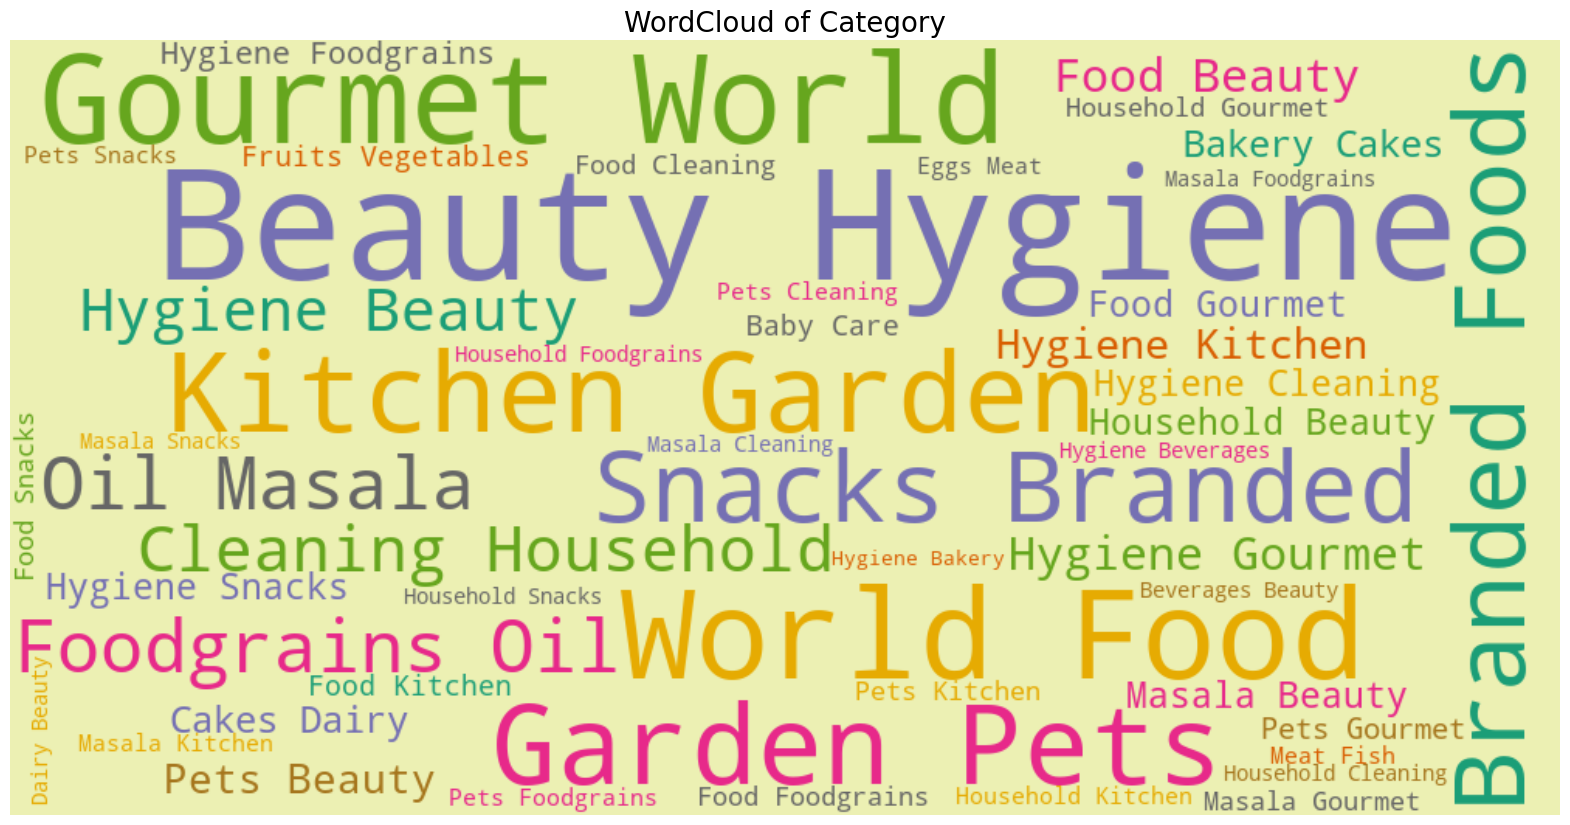

In [8]:
text = " ".join(cat for cat in prod_data.category)
plt.figure(figsize = (20,15))
wc = WordCloud(width=1000,
           height=500, 
           max_words=50,
           colormap= 'Dark2', 
           max_font_size = 100,
           random_state=88, 
           background_color='#ECF0B3').generate(text)
plt.imshow(wc, interpolation='bilinear')
plt.title('WordCloud of Category', fontsize=20)
plt.axis('off')
plt.show()

<div style="text-align: left; background-color: #ECF0B3;  color: black; padding: 14px; line-height: 1.0;"> <b>🕵️‍♂️Observation:</b>
    Category <b>Beauty & Hygiene</b> has the highest number of products, followed by <b>Gourmet & World Food</b> and <b>Kitchen, Garden & Pets</b></div>


In [9]:
brand_type=prod_data[['brand', 'type']]
# brand_type=brand_type.drop_duplicates()
brand_type=brand_type.groupby('brand').agg(type_count=('type','count')).reset_index().sort_values('type_count', ascending=False)
brand_type = brand_type.head(10)

fig = go.Figure(data=px.bar(x=brand_type.brand, 
                            y=brand_type.type_count,
                            color = brand_type.brand,
                            color_discrete_sequence= colorsy,
                            title='<b>Top 10 Brands with highest No. of Product Types</b>',
                            text = brand_type.type_count,
                            height=500))
fig.update_layout(
    font_family="Courier New",
    title_font_family="Courier New",
    title_font_color="green",
    title_font_size=20,
    xaxis_title="<b>Brand</b>",
    yaxis_title="<b>No. of Product Types</b>",
    legend_title_font_color="green",
    plot_bgcolor='#edf7da'
)
fig.show()

<div style="text-align: left; background-color: #ECF0B3;  color: black; padding: 14px; line-height: 0.5;"> <b>🕵️‍♂️Observation:</b>
Brand <b>Fresho</b> has the highest number of Product Types, followed by <b>bb Royal</b> and <b>BB Home</b></div>


In [10]:
cat_subctg=prod_data.groupby('category').agg(subctg_count=('sub_category', 'count')).reset_index().sort_values('subctg_count')
cat_subctg=cat_subctg.sort_values('subctg_count', ascending=False)
#cat_subctg


fig = px.pie(values=cat_subctg.subctg_count, 
             names=cat_subctg.category,
             color_discrete_sequence=colorsy)
fig.update_traces(textposition='inside',
                  textfont_size=11,
                  textinfo='value+label')

fig.update_layout(title_text="<b>Category and their Sub-Categories Count</b>",
                  title_font_family="Times New Roman",
                  title_font_color="green",
                  title_font_size=20,
                  uniformtext_minsize=12, 
                  uniformtext_mode='hide')

fig.show()

<div style="text-align: left; background-color: #ECF0B3;  color: black; padding: 14px; line-height: 1.0;"> <b>🕵️‍♂️Observation:</b>
Category <b>Beauty & Hygiene</b> has the highest number of Sub-Categories, followed by <b>Gourmet & World Food</b> and <b>Kitchen, Garden & Pets</b></div>

<a id="4.3"></a>
### <div style="text-align: left; background-color: #A5D74A;  color: black; padding: 14px; line-height: 0.5;"> 🛒Analysis of Sale Price</div>

In [11]:
print(Back.GREEN+ Style.BRIGHT+ 'Analysis of Sale Price:' + Style.RESET_ALL)
print('Minimum Sale Price : '+ Fore.RED+ Style.BRIGHT+ str(prod_data['sale_price'].min()) + Style.RESET_ALL)
print('Maximum Sale Price : '+ Fore.RED+ Style.BRIGHT+ str(prod_data['sale_price'].max()) + Style.RESET_ALL)
print('Mean Sale Price    : '+ Fore.RED+ Style.BRIGHT+ str(round(prod_data['sale_price'].mean(),2)) + Style.RESET_ALL)

Analysis of Sale Price:
Minimum Sale Price : 2
Maximum Sale Price : 12500
Mean Sale Price    : 322.51


In [12]:
range_val = [['1-10',1, 10], ['11-25', 11, 25], ['26-50', 26, 50],
              ['51-100',51, 100], ['101-150', 101, 150], ['151-200', 151, 200],
              ['201-300',201, 300], ['301-400', 301, 400], ['401-500', 401, 500],
              ['501-1000',501, 1000], ['1001-1500', 1001, 1500], ['1501-2000', 1501, 2000],
              ['2001-3000',2001, 3000], ['3001-5000', 3001, 5000], ['5001-10000', 5001, 10000], 
              ['10001-15000',10001, 15000]] 
range_df = pd.DataFrame(range_val, columns=['range_name', 'min_val', 'max_val'])

# range_df

range_df['prod_count']=''
for idx, row in range_df.iterrows():
    range_df.at[idx, 'prod_count'] = len(prod_data['product'][(prod_data['sale_price']>= row['min_val']) & (prod_data['sale_price']<= row['max_val'])])
# range_df

fig = go.Figure(data=px.bar(x=range_df.range_name, 
                            y=range_df.prod_count,
                            color = range_df.range_name,
                            color_discrete_sequence=colorsy,
                            title='<b>Sale Price Range of the Products</b>',
                            text = range_df.prod_count,
                            height=500))
fig.update_layout(
    font_family="Courier New",
    title_font_family="Courier New",
    title_font_color="green",
    title_font_size=20,
    xaxis_title="<b>Price Range</b>",
    yaxis_title="<b>No. of Products</b>",
    legend_title_font_color="green",
    plot_bgcolor='#edf7da'
)
fig.show()

<div style="text-align: left; background-color: #ECF0B3;  color: black; padding: 14px; line-height: 1.5;"> <b>🕵️‍♂️Observation:</b>  
    From the above plot we can observe the following :
    
<b>28%</b> of the products are under <b>Rs100</b>  
<b>53%</b> of the products are covered in price range <b>1-200</b>  
<b>78%</b> of the products are covered in price range <b>1-400</b>  
<b>95%</b> of the products are covered in price range <b>1-1000</b> </div>

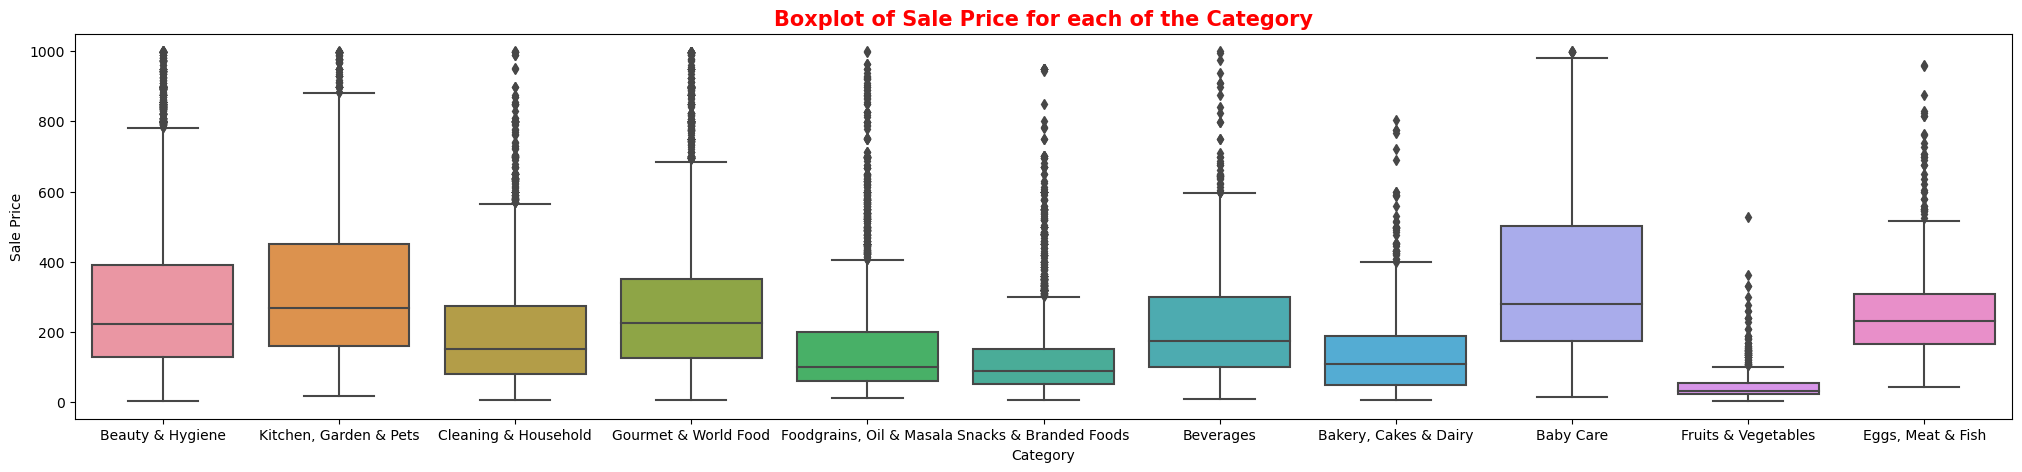

In [13]:
#boxplot for distribution
f = plt.figure()
f.set_figwidth(25)
f.set_figheight(5)

box_df= prod_data[prod_data['sale_price']<=1000]

sns.boxplot(y=box_df['sale_price'], x=box_df['category'])
plt.title('Boxplot of Sale Price for each of the Category', fontsize=15, color='red', fontweight='bold')
plt.ylabel('Sale Price')
plt.xlabel('Category');


<div style="text-align: left; background-color: #ECF0B3;  color: black; padding: 14px; line-height: 1.0;"> <b>🕵️‍♂️Observation:</b>
Even though we have very wide range of sale price in each of the categories, all of them are having mean price around 150-300</div>
 

<a id="4.4"></a>
### <div style="text-align: left; background-color: #A5D74A;  color: black; padding: 14px; line-height: 0.5;"> 🛍️Analysis of Rating</div>

> <b>For this analysis we shall consider only the brands that have minimum of 50 products rating. </b>

In [14]:
rating_df=prod_data[prod_data['rating'].notnull()].groupby('brand').agg(rating_count=('rating', 'count'))\
      .reset_index().sort_values('rating_count', ascending=False)
rating_df= rating_df[rating_df['rating_count']>=50]

brand_avg_rating=prod_data[prod_data['brand'].isin(rating_df['brand'])].groupby(['brand'])\
    .agg(avg_rating=('rating', 'mean')).reset_index().sort_values('avg_rating', ascending=False)
brand_avg_rating= brand_avg_rating.round({"avg_rating":1})
brand_avg_rating=brand_avg_rating.sort_values('avg_rating', ascending=False)
# brand_avg_rating

print(Back.GREEN+ Style.BRIGHT+ 'Brand Average Rating Details:' + Style.RESET_ALL)
brand_avg_rating['avg_rating'].describe()

Brand Average Rating Details:


count    61.000000
mean      3.970492
std       0.212402
min       3.400000
25%       3.800000
50%       4.000000
75%       4.100000
max       4.500000
Name: avg_rating, dtype: float64

<div style="text-align: left; background-color: #ECF0B3;  color: black; padding: 14px; line-height: 0.5;"> <b>🕵️‍♂️Observation:</b>
Brands (that have at least 50 products rating) received rating between 3.4 and 4.5</div>

In [15]:
from _plotly_utils.colors.colorbrewer import Dark2
color_scheme=Dark2 #      px.colors.sequential.Dark2  #Peach

fig = px.treemap(brand_avg_rating, 
                 path=['avg_rating', 'brand'],
                 values='avg_rating', 
                 title = '<b> Brands and their Rating</b>',
                 color_discrete_sequence= color_scheme,
                 width=1000, height=500)
fig.update_layout(template = 'ggplot2')
fig.show()

<a id="4.5"></a>
### <div style="text-align: left; background-color: #A5D74A;  color: black; padding: 14px; line-height: 0.5;"> 🤑Analysis of Discount</div>

In [16]:
print(Back.GREEN+ Style.BRIGHT+ 'Product with Highest Discount:' + Style.RESET_ALL)
prod_data[['product','category','discount_pct']][prod_data['discount_pct']==prod_data['discount_pct'].max()]

Product with Highest Discount:


product             category  discount_pct
26976  Curry Leaves  Fruits & Vegetables         86.67

In [17]:
print(Back.GREEN+ Style.BRIGHT+ 'Top 20 Disounts:' + Style.RESET_ALL)
prod_data[['product','category','discount_pct']].sort_values('discount_pct', ascending=False).head(20).style.background_gradient("Greens")

Top 20 Disounts:


In [18]:
catg_disc=prod_data[prod_data['discount_pct']!=0].groupby('category').agg(avg_discount=('discount_pct','mean')).reset_index()
catg_disc=catg_disc.sort_values('avg_discount', ascending=False)
catg_disc= catg_disc.round({"avg_discount":2})
# catg_disc

fig = go.Figure(data=px.bar(x=catg_disc.category, 
                            y=catg_disc.avg_discount,
                            color = catg_disc.category,
                            color_discrete_sequence=colorsy, #px.colors.sequential.Greens,
                            title='<b>Category wise Average Discount Offered</b>',
                            text = catg_disc.avg_discount,
                            height=500))
fig.update_layout(
    font_family="Courier New",
    title_font_family="Courier New",
    title_font_color="green",
    title_font_size=20,
    xaxis_title="<b>Category</b>",
    yaxis_title="<b>Average Discount</b>",
    legend_title_font_color="green",
    plot_bgcolor='#edf7da'
)
fig.show()

<div style="text-align: left; background-color: #ECF0B3;  color: black; padding: 14px; line-height: 1.0;"> <b>🕵️‍♂️Observation:</b>
    Highest average discount is observed in <b>Kitchen, Garden & Pets</b> category, followed by <b>Fruits & Vegetables</b> and <b>Beverages</b> Categories</div>

<a id="4.6"></a>
### <div style="text-align: left; background-color: #A5D74A;  color: black; padding: 14px; line-height: 0.5;"> 🏷️Analysis of Bigbasket's Own Brands </div>

<div style="text-align: left; background-color: #ECF0B3;  color: black; padding: 14px; line-height: 1.5;"> <b>🕵️‍♂️Analysis on Big Basket's own brands :</b>
Bigbasket is popular for its own brands which are sold in its online store along with other brands. These brands occupy significant share of Bigbasket Online Store business. From the names of the brands we can consider the following brands as Bigbasket brands :  
    
<b>'Fresho','bb Royal','BB Home','Fresho Signature','bb Combo','bb Popular','BB Home Herbal','BB Royal Organic','bigbasket','Fresho Organic'</b></div>

In [19]:
bb_brands = ['Fresho','bb Royal','BB Home','Fresho Signature','bb Combo','bb Popular',
             'BB Home Herbal','BB Royal Organic','bigbasket','Fresho Organic']
prod_data['is_bb_brand'] = prod_data.apply(lambda x: 'BigBasket' if x['brand'] in(bb_brands) else 'Non-BB', axis=1)
# prod_data

ctg_brand_split = prod_data[['product','category', 'is_bb_brand']].groupby(['category', 'is_bb_brand'])\
                  .agg(prod_count=('product', 'count')).reset_index()


ctg_brand_split['brand_count'] = ctg_brand_split.apply(lambda row: row['is_bb_brand']+ '-' + str(row['prod_count']), axis=1)

# ctg_brand_split


fig=px.sunburst(data_frame=ctg_brand_split, path=['category','brand_count'], width=1000, height=700)
fig.update_layout(title_text="<b>Category wise BB & Non-BB Products Count </b>",
                  title_font_family="Times New Roman",
                  title_font_color="red",
                  title_font_size=20)
fig.show()

<div style="text-align: left; background-color: #ECF0B3;  color: black; padding: 14px; line-height: 1.5;"> <b>🕵️‍♂️Observations :</b>  
    
In <b>Fruits & Vegetables</b> catergory Bigbasket sells <b>97%</b> of the products under it's own brands.  
    In <b>Eggs, Meat & Fish</b> and <b>Foodgrains, Oil & Masala</b> categories, Bigbasket brands occupy <b>31%</b> and <b>23%</b> respectively.  
    This shows Bigbasket brands have very significant share in the sales of household daily cooking/food products.  
    Bigbasket brands <b>Fresho</b>, <b>bb Royal</b> and <b>BB Home</b> has the highest number of Product Types.  
    Bigbasket brands have very little presence (<b>less than 1%</b>) in <b>Baby Care</b>, <b>Beauty & Hygiene</b> and <b>Snacks & Branded Foods</b> categories </div>


In [20]:
#Effect of discunt on rating. For this analysis we will be considering products having both Rating and Discount 
disc_rat =prod_data[(prod_data['discount_pct']>0) & (~prod_data['rating'].isnull())]
disc_rat2 = prod_data[prod_data['sub_category'].isin(disc_rat['sub_category'])].groupby(['sub_category'])\
            .agg(prod_count=('product','count')).reset_index().sort_values('prod_count', ascending=False).head(20)
# disc_rat2            
disc_rat_df=disc_rat[disc_rat['sub_category'].isin(disc_rat2['sub_category'])].groupby(['sub_category','is_bb_brand'])\
        .agg({'rating': 'mean', 'discount_pct': 'mean', 'product':'count'}).reset_index()
# disc_rat_df

fig = px.scatter(disc_rat_df, x="rating", y="discount_pct",
                 size="product", color="is_bb_brand",
                 log_x=True, size_max=60,
                 title="<b>Rating on discounted products among BB and Non-BB Brands</b>",
                 template = 'ggplot2')

listt = [0,1]
for idx in listt:
    fig.data[idx].marker.line.width = 5
    fig.data[idx].marker.line.color = 'black'

fig.update_layout(
    font_family="Courier New",
    title_font_family="Courier New",
    title_font_color="red",
    title_font_size=20,
    xaxis_title="<b>Category</b>",
    yaxis_title="<b>Discount Percentage</b>",
    legend_title_font_color="green",
    plot_bgcolor='#edf7da'
)
    
fig.show()

<div style="text-align: left; background-color: #ECF0B3;  color: black; padding: 14px; line-height: 1.5;"> <b>🕵️‍♂️Observation:</b> For the Non-Bigbasket Brands Rating has not increased with Discount where as for the Bigbasket Brands we can observe there is increase in Rating with Discount

<a id="5"></a>
# <div style="text-align: Center; background-color: #A5D74A;  color: black; padding: 14px; line-height: 0.5;"> 🛒Thank You🛒</div>  
<div style="text-align: left; background-color: #A5D74A;  color: black; padding: 14px; line-height: 1.5;"> <b>Thank You</b> for taking time to go through the above analysis. Do comment and Upvote if you like my work.
